In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Keras入門

ディープラーニングを実行するためのライブラリとしてKerasを紹介します。

公式のドキュメント
https://keras.io/ja/

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:100,:]
y = iris.target[:100]

## モデルを構築する

Sequenctialモデルに層を積み重ねていく。

Denseは単純にすべてのネットワークを結合するもの。

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(units=1, activation='sigmoid', input_dim=4))

Using Theano backend.


`summary()`メソッドで、現在のモデルの様子を見ることができる。

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


## モデルのコンパイル
- 最適化アルゴリズムの指定
- 損失関数の指定
- 評価関数の指定

をすることで、どのように学習するかを指定することができる。

ここでは2クラス分類なので、`loss='binary_crossentropy'`を指定する。
最適化は確率的勾配法sgdを用い、評価は正解率accuracyを用いる。

他クラス分類なら`loss='categorical_crossentropy'`を、回帰なら`loss='mse'`を用いる

In [5]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 訓練と予測、モデルと重みの保存、読み込み

`model.fit()`で訓練、
`model.evaluate()`でモデルの評価、
`model.predict()`で予測ができる。

モデルや学習したパラメータを保存することができる。
また、保存してあるモデルやパラメータを読み込むことができる。

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
90/90 [==============================] - 0s 51us/step - loss: 2.5320 - acc: 0.5000
Epoch 2/20
90/90 [==============================] - 0s 55us/step - loss: 2.0840 - acc: 0.5000
Epoch 3/20
90/90 [==============================] - 0s 58us/step - loss: 1.6618 - acc: 0.5000
Epoch 4/20
90/90 [==============================] - 0s 69us/step - loss: 1.3081 - acc: 0.5000
Epoch 5/20
90/90 [==============================] - 0s 56us/step - loss: 1.0346 - acc: 0.5000
Epoch 6/20
90/90 [==============================] - 0s 64us/step - loss: 0.8504 - acc: 0.5000
Epoch 7/20
90/90 [==============================] - 0s 69us/step - loss: 0.7421 - acc: 0.5000
Epoch 8/20
90/90 [==============================] - 0s 61us/step - loss: 0.6831 - acc: 0.5111
Epoch 9/20
90/90 [==============================] - 0s 71us/step - loss: 0.6482 - acc: 0.6444
Epoch 10/20
90/90 [==============================] - 0s 57us/step - loss: 0.6291 - acc: 0.8889
Epoch 11/20
90/90 [==============================] - 0s 47u

In [7]:
model.evaluate(X_train, y_train)

90/90 [==============================] - 0s 21us/step


[0.51361474858389955, 0.98888888094160288]

In [8]:
prediction = model.predict_classes(X_test)
print(prediction)

[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [9]:
y_test.reshape(-1,1) == prediction

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]], dtype=bool)

In [10]:
model.save('my_model.h5')
del model

In [11]:
model.summary()

NameError: name 'model' is not defined

In [12]:
from keras.models import load_model
model = load_model('my_model.h5')

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [14]:
((model.predict(X) > 0.5) == y.reshape(-1,1)).sum()

99

## KerasでMNISTの分類

In [15]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

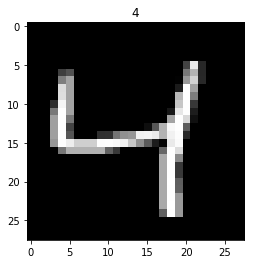

In [16]:
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.title(y_train[2]);

In [17]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [18]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

## 単純な一層モデル

In [43]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten

In [44]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)
print(model.summary())

input shape  (None, 28, 28)
output shape  (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


### 最適化
https://keras.io/ja/optimizers/

勾配法を改良して、パラメータを最適化する方法が色々考えられている。

In [23]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_train[0]

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [45]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
54000/54000 [==============================] - 1s 27us/step - loss: 14.2546 - acc: 0.1155
Epoch 2/20
54000/54000 [==============================] - 1s 27us/step - loss: 12.1853 - acc: 0.2437
Epoch 3/20
54000/54000 [==============================] - 1s 27us/step - loss: 10.4699 - acc: 0.3499
Epoch 4/20
54000/54000 [==============================] - 1s 27us/step - loss: 10.1860 - acc: 0.3679
Epoch 5/20
54000/54000 [==============================] - 1s 27us/step - loss: 10.0872 - acc: 0.3739
Epoch 6/20
54000/54000 [==============================] - 1s 27us/step - loss: 10.0809 - acc: 0.3744
Epoch 7/20
54000/54000 [==============================] - 1s 27us/step - loss: 9.9966 - acc: 0.3796
Epoch 8/20
54000/54000 [==============================] - 1s 27us/step - loss: 9.9591 - acc: 0.3820
Epoch 9/20
54000/54000 [==============================] - 1s 27us/step - loss: 9.9424 - acc: 0.3830
Epoch 10/20
54000/54000 [==============================] - 1s 27us/step - loss: 9.9386 - acc: 

In [47]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'loss'])

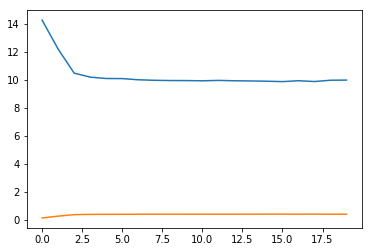

In [48]:
loss_values = history_dict['loss']
acc_values = history_dict['acc']

plt.plot(loss_values)
plt.plot(acc_values)

In [49]:
predictions = model.predict_classes(x_val, verbose=0)
(predictions == y_val).sum()/len(y_val)

0.37233333333333335

## 多層モデル

In [31]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='sigmoid')) #reluだと学習が上手くいかない
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)
print(model.summary())

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

input shape  (None, 28, 28)
output shape  (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
54000/54000 [==============================] - 17s 314us/step - loss: 0.4628 - acc: 0.8671
Epoch 2/10
54000/54000 [==============================] - 21s 397us/step - loss: 0.3207 - acc: 0.9019
Epoch 3/10
54000/54000 [==============================] - 25s 457us/step - loss: 0.2880 - acc: 0.9117
Epoch 4/10
54000/54000 [==============================] - 25s 463us/step - loss: 0.2584 - acc: 0.9209
Epoch 5/10
54000/54000 [==============================] - 27s 504us/step - loss: 0.2426 - acc: 0.9250
Epoch 6/10
54000/54000 [==============================] - 25s 463us/step - loss: 0.2266 - acc: 0.9291
Epoch 7/10
54000/54000 [==============================] - 27s 494us/step - loss: 0.2134 - acc: 0.9328
Epoch 8/10
54000/54000 [==============================] - 28s 511us/step - loss: 0.2003 - acc: 0.9374
Epoch 9/10
54000/54000 [==============================] - 30s 559us/step - loss: 0.1920 - acc: 0.9406
Epoch 10/10
54000/54000 [==============================] - 28s 511us/step - loss: 

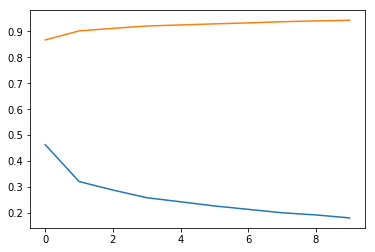

In [33]:
history_dict = history.history
loss_values = history_dict['loss']
acc_values = history_dict['acc']

plt.plot(loss_values)
plt.plot(acc_values)

In [34]:
predictions = model.predict_classes(x_val, verbose=0)
(predictions == y_val).sum()/len(y_val)

0.94366666666666665

## CNN

In [49]:
#https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adadelta
from keras.losses import categorical_crossentropy

batch_size = 128
num_classes = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

In [50]:
model.summary() #18496 = 64 * 289 = 64 * (1 + 9 * 32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [51]:
# 15分ぐらいかかる
history = model.fit(x_train.reshape(-1,28,28,1),
                    y_train, batch_size=batch_size, verbose=1, epochs=5)

Epoch 1/10
54000/54000 [==============================] - 207s 4ms/step - loss: 1.0338 - acc: 0.8271
Epoch 2/10
54000/54000 [==============================] - 204s 4ms/step - loss: 0.1848 - acc: 0.9473
Epoch 3/10
54000/54000 [==============================] - 204s 4ms/step - loss: 0.1251 - acc: 0.9646
Epoch 4/10
54000/54000 [==============================] - 204s 4ms/step - loss: 0.0947 - acc: 0.9725
Epoch 5/10
54000/54000 [==============================] - 203s 4ms/step - loss: 0.0778 - acc: 0.9777
Epoch 6/10
54000/54000 [==============================] - 205s 4ms/step - loss: 0.0642 - acc: 0.9809
Epoch 7/10
54000/54000 [==============================] - 204s 4ms/step - loss: 0.0570 - acc: 0.9832
Epoch 8/10
54000/54000 [==============================] - 202s 4ms/step - loss: 0.0500 - acc: 0.9854
Epoch 9/10
54000/54000 [==============================] - 207s 4ms/step - loss: 0.0461 - acc: 0.9862
Epoch 10/10
54000/54000 [==============================] - 206s 4ms/step - loss: 0.0425 - a

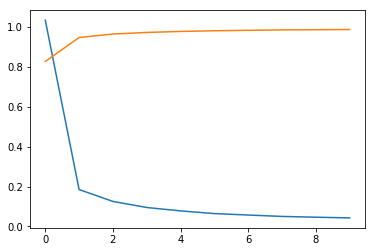

In [52]:
history_dict = history.history
loss_values = history_dict['loss']
acc_values = history_dict['acc']

plt.plot(loss_values)
plt.plot(acc_values)

In [55]:
predictions = model.predict_classes(x_val.reshape(-1,28,28,1), verbose=0)
(predictions == y_val).sum()/len(y_val)

0.98950000000000005